# PROJETO DADOS DO CENSO UCI - PARTE 1

**Objetivo**: A tarefa é prever se renda anual de um indivíduo é superior a $50.000 por ano com base em dados do censo.

**Dataset**: O conjunto de dados para este projeto é originário do [Repositório de Aprendizado de Máquina da UCI](https://archive.ics.uci.edu/ml/datasets/Adult)

**Habilidades Avaliadas em Todo o Projeto**: 
- Manipulação de arquivos .csv
- Limpeza e Tratamento dos dados
- Análise exploratória dos dados
- Técnicas de preprocessamento e transformação dos dados (OneHotEncoder, OrdinalEncoder, StandardScaler, .get_dummies, .qcut)
- Seleção de features
- Ajuste dos hiperparâmetros (GridSearchCV)
- Aplicação de modelos de machine learning para classificação (LogisticRegression, KNeighborsClassifier, RandomForest, DecisionTree, MLPClassifier)
- Métricas de validação (validação cruzada, acurácia, precisão, f1 score, matriz de confusão e relatório de classificação)
- Previsão com a base de teste
- Persistindo o modelo final de machine learning para o disco (joblib)
- Pensamento analítico e conclusão
- Projeção para outros tipos de problemas de negócio

**___________________________________________________________________________________________________________________________**

# DESCRIÇÃO DO DATASET

- **age**: Idade.

- **workclass**: Classe trabalhadora.

- **education**: Níveis de Escolaridade.

- **education-num**: Código do Nível de Escolaridade.

- **marital-status**: Estado Civil.

- **occupation**: Ocupação.

- **relationship**: Relacionamento.

- **race**: Raça.

- **sex**: Sexo.

- **capital-gain**: Ganho de Capital.

- **capital-loss**: Perda de Capital.

- **hours-per-week**: Horas de trabalho por Semana.

- **native-country**: País Nativo.

- **fnlwgt**: "fnlwgt" é uma abreviação de "final weight" (peso final) e refere-se a um valor utilizado em análises estatísticas, especialmente em pesquisas de amostra, como o Censo dos Estados Unidos. Esse peso é aplicado para ajustar a amostra de forma que ela represente adequadamente a população total, levando em conta fatores como a seleção da amostra e a não resposta. Assim, o "fnlwgt" ajuda a garantir que os resultados da pesquisa reflitam com precisão as características demográficas da população.

**___________________________________________________________________________________________________________________________**

# ETAPAS DO PROJETO
- [Importação](#importacao)
- [Análise Exploratória](#analise)
- [Tratamento](#tratamento)
- [Modelagem](#modelagem)
- [Avaliação](#avaliacao)
- [Previsão](#previsao)
- [Conclusão](#conclusao)
- [Resumo](#resumo)

**___________________________________________________________________________________________________________________________**

<a id='importacao'></a>
# IMPORTAÇÃO

- O projeto é composto basicamente por duas bases de dados, uma para treinamento e outra para teste.
    - **Base de Treino:** 'dataset/dados_brutos/adult_train.data'
    - **Base de Teste:** 'dataset/dados_brutos/adult_test.test'

In [1]:
# Importação de algumas bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Tratando e Manipulando os Arquivos .csv
- Antes de iniciar o projeto, precisamos importar, manipular, limpar e tratar os dados brutos para que fiquem na forma correta

- **Base de Treino**

In [2]:
# Importação da base de dados
df_treino = pd.read_csv('dataset/dados_brutos/adult_train.data', header = None, skipinitialspace=True)
df_treino.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- Observe que o arquivo disponibilizado não possui cabeçalho para nomear as colunas
- Por conta disso, teremos que obter os nomes das colunas através do arquivo 'adult_description.names'

- **Abrindo o arquivo adult_description**

In [3]:
# Abrindo o arquivo csv
file = open('dataset/dados_brutos/adult_description.names', 'r')

In [4]:
# Lendo todas as linhas do arquivo e armazendo em uma variável
rows = file.readlines()

In [5]:
# Fechando o arquivo csv
file.close()

In [6]:
# Exibindo as linhas do arquivo
rows

['| This data was extracted from the census bureau database found at\n',
 '| http://www.census.gov/ftp/pub/DES/www/welcome.html\n',
 '| Donor: Ronny Kohavi and Barry Becker,\n',
 '|        Data Mining and Visualization\n',
 '|        Silicon Graphics.\n',
 '|        e-mail: ronnyk@sgi.com for questions.\n',
 '| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).\n',
 '| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)\n',
 '| 45222 if instances with unknown values are removed (train=30162, test=15060)\n',
 '| Duplicate or conflicting instances : 6\n',
 '| Class probabilities for adult.all file\n',
 "| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)\n",
 "| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)\n",
 '|\n',
 '| Extraction was done by Barry Becker from the 1994 Census database.  A set of\n',
 '|   reasonably clean records was extracted using the following conditions:\n',
 '|   ((AAGE>16) && (AG

- Observe que agora temos uma lista chamada "rows" que contém todas as linhas do arquivo "adult_description"
- Queremos apenas as últimas linhas que contém informações da base de dados. Vamos selecioná-las

In [7]:
# Selecionando as últimas linhas
description = [descr.strip() for descr in rows[-14:]]

In [8]:
# Observe que agora nós temos a descrição de cada coluna
description

['age: continuous.',
 'workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.',
 'fnlwgt: continuous.',
 'education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.',
 'education-num: continuous.',
 'marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.',
 'occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.',
 'relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.',
 'race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.',
 'sex: Female, Male.',
 'capital-gain: continuous.',
 'capital-loss: continuous.',
 'hours-per-week: continuous.',
 'nativ

- Vamos agora pegar apenas o nome das colunas

In [9]:
# Selecionando apenas os nomes das colunas e adicionando o 'income' a lista
columns = [col.split(':')[0] for col in description]
columns.append('income') #adicionando ao final da lista o nome da nossas variável alvo
columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

- **Atualizando a base de treino com os nomes das colunas**
    - Agora que temos os nomes de cada coluna, podemos atualizar a base de treino

In [10]:
# Vamos visualizar novamente o dataframe
df_treino.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [11]:
# Inserindo os nomes das colunas
df_treino.columns = columns

In [12]:
# Observe agora o nosso dataframe com cada coluna nomeada corretamente
df_treino.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


- Renomeando algumas colunas apenas para facilitar no restante do projeto

In [13]:
# Renomeando algumas colunas
df_treino = df_treino.rename(columns={'education-num': 'education_num', 
                         'marital-status': 'marital_status',
                         'capital-gain': 'capital_gain',
                         'capital-loss': 'capital_loss',
                         'hours-per-week': 'hours_per_week',
                         'native-country': 'native_country'})
df_treino.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


- **Base de Teste**
    - Agora, vamos fazer o mesmo processo para o arquivo que contém os dados de teste, atualizando com os nomes das colunas

In [14]:
# Importação da base de dados
df_teste = pd.read_csv('dataset/dados_brutos/adult_test.test', names=columns, skipinitialspace=True, skiprows=[0])

df_teste.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [15]:
# Renomeando algumas colunas
df_teste = df_teste.rename(columns={'education-num': 'education_num', 
                         'marital-status': 'marital_status',
                         'capital-gain': 'capital_gain',
                         'capital-loss': 'capital_loss',
                         'hours-per-week': 'hours_per_week',
                         'native-country': 'native_country'})
df_teste.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [16]:
# Removendo o '.' no final de cada valor da coluna 'income'
df_teste.loc[:, 'income'] = df_teste.loc[:, 'income'].apply(lambda x: x.split('.')[0])

- **Salvando as bases de treino e teste com a formatação correta em um novo arquivo csv**

In [17]:
# Exportando as bases
df_treino.to_csv('dataset/dados_limpos/adult_train.csv', index=False)
df_teste.to_csv('dataset/dados_limpos/adult_test.csv', index=False)

## Importando a Base de Dados

- **Base de Treino**

In [18]:
# Importando a base
df_treino = pd.read_csv('dataset/dados_limpos/adult_train.csv')

In [19]:
# Exibindo o dataframe
df_treino.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


- **Base de Teste**

In [20]:
# Importando a base
df_teste = pd.read_csv('dataset/dados_limpos/adult_test.csv')

In [21]:
# Exibindo o dataframe
df_teste.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


**___________________________________________________________________________________________________________________________**

<a id='analise'></a>
# ANÁLISE EXPLORATÓRIA

## Relatório ydata-profiling
- Vamos iniciar a análise da base utilizando o ydata-profiling para gerar um relatório e facilitar nossa análise geral
- Após isso, podemos ir analisando cada coluna e suas relações para um entendimento mais profundo
- https://github.com/ydataai/ydata-profiling

In [22]:
# Importando a biblioteca ydata-profiling
from ydata_profiling import ProfileReport

In [23]:
# Instanciando o ProfileReport
report = ProfileReport(df_treino, title='adult_report')

In [24]:
# Criando o relatório html
report.to_file('adult_report.html')

C:\Users\Douglas\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Analisando algumas informações da base

- **Base de Treino**

In [25]:
# Analisando informações da base
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- **Base de Teste**

In [26]:
# Analisando informações da base
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


## Verificando os valores nulos

- **Base de Treino**

In [27]:
# Verificando os valores nulos
df_treino.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

- **Base de Teste**

In [28]:
# Verificando os valores nulos
df_teste.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

- Não temos valores nulos em ambas as bases

## Verificando os valores duplicados

- **Base de Treino**

In [29]:
# Verificando os valores duplicados
df_treino.duplicated().sum()

24

- **Base de Teste**

In [30]:
# Verificando os valores duplicados
df_teste.duplicated().sum()

5

- Temos alguns valores duplicados, precisaremos tratá-los

## Verificando a cardinalidade

- **Base de Treino**

In [31]:
# Verificando a cardinalidade das colunas
df_treino.nunique().sort_values(ascending=False)

fnlwgt            21648
capital_gain        119
hours_per_week       94
capital_loss         92
age                  73
native_country       42
education            16
education_num        16
occupation           15
workclass             9
marital_status        7
relationship          6
race                  5
sex                   2
income                2
dtype: int64

- **Base de Teste**

In [32]:
# Verificando a cardinalidade das colunas
df_teste.nunique().sort_values(ascending=False)

fnlwgt            12787
capital_gain        113
hours_per_week       89
capital_loss         82
age                  73
native_country       41
education            16
education_num        16
occupation           15
workclass             9
marital_status        7
relationship          6
race                  5
sex                   2
income                2
dtype: int64

## Verificando as colunas categóricas

- **Base de Treino**

In [33]:
# Tipo de variável de cada coluna
df_treino.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [34]:
# Selecionando apenas as colunas categóricas
cat_cols = df_treino.columns[df_treino.dtypes == 'object']
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [35]:
# Visualizando as colunas categóricas
df_treino[cat_cols].head(3)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K


In [36]:
# Analisando a estatística descritiva da base das colunas categóricas
df_treino.describe(include=['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


- **Base de Teste**

In [37]:
# Analisando a estatística descritiva da base das colunas categóricas
df_teste.describe(include=['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,16281,16281,16281,16281,16281,16281,16281,16281,16281
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,11210,5283,7403,2032,6523,13946,10860,14662,12435


- Perceba que a coluna 'income' é o nosso target, a coluna que queremos prever. Essa coluna é do tipo categórica e por isso será necessário converte-la para numérica.

## Verificando os outliers

- **Base de Treino**

In [38]:
# Analisando a estatística descritiva da base
df_treino.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Aparentemente as colunas **capital-gain, capital-loss e hours-per-week** possuem valores discrepantes

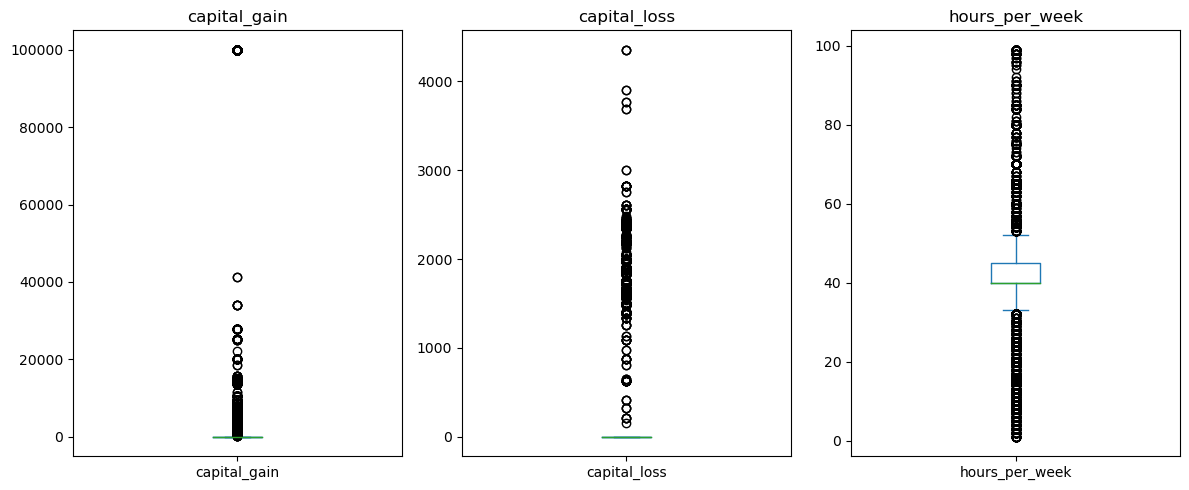

In [39]:
# Visualizando a distribuição das colunas citadas acima

plt.figure(figsize = (12, 5))

plt.subplot(1, 3, 1)
plt.title('capital_gain')
df_treino['capital_gain'].plot.box()

plt.subplot(1, 3, 2)
plt.title('capital_loss')
df_treino['capital_loss'].plot.box()

plt.subplot(1, 3, 3)
plt.title('hours_per_week')
df_treino['hours_per_week'].plot.box()

plt.tight_layout()

- **Base de Teste**

In [40]:
# Analisando a estatística descritiva da base
df_teste.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


- Aparentemente as colunas **capital-gain, capital-loss e hours-per-week** possuem valores discrepantes

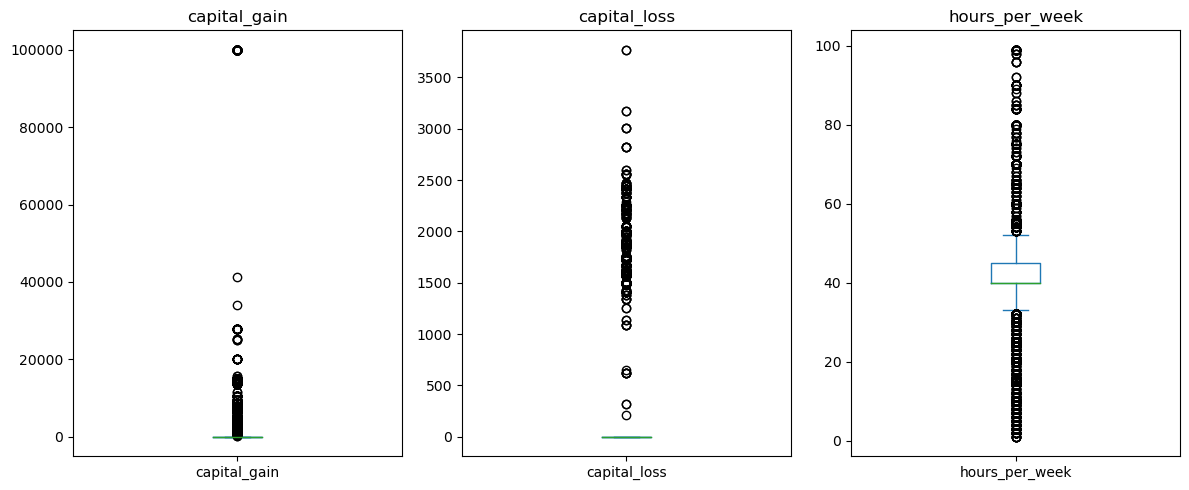

In [41]:
# Visualizando a distribuição das colunas citadas acima

plt.figure(figsize = (12, 5))

plt.subplot(1, 3, 1)
plt.title('capital_gain')
df_teste['capital_gain'].plot.box()

plt.subplot(1, 3, 2)
plt.title('capital_loss')
df_teste['capital_loss'].plot.box()

plt.subplot(1, 3, 3)
plt.title('hours_per_week')
df_teste['hours_per_week'].plot.box()

plt.tight_layout()

**___________________________________________________________________________________________________________________________**

<a id='tratamento'></a>
# TRATAMENTO

## Tratando as Colunas Duplicadas
- Vamos iniciar o nosso tratamento removendo as linhas duplicadas

- **Base de Treino**

In [42]:
# Quantidade de registros duplicados
df_treino.duplicated().sum()

24

In [43]:
# Removendo os valores duplicados
df_treino = df_treino.drop_duplicates(ignore_index=True)

In [44]:
# Quantidade de registros duplicados igual a zero
df_treino.duplicated().sum()

0

- **Base de Teste**

In [45]:
# Quantidade de registros duplicados
df_teste.duplicated().sum()

5

In [46]:
# Removendo os valores duplicados
df_teste = df_teste.drop_duplicates(ignore_index=True)

In [47]:
# Quantidade de registros duplicados igual a zero
df_teste.duplicated().sum()

0

- A remoção de valores duplicados é crucial para garantir a qualidade e a precisão dos dados, melhorando a eficiência operacional e a confiabilidade nas análises e nas decisões tomadas a partir desses dados.

## Tratando a Coluna Income
- Vamos agora transformar a nossa coluna target 'income' em numérica

- **Base de Treino**

In [48]:
# Frequencia de cada classe
df_treino['income'].value_counts()

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

- Observe que temos duas classes e iremos codificá-la da seguinte forma:
    - **>50K (maior que 50k) = 1**
    - **<=50K (menor ou igual a 50k) = 0**

- De acordo com o nosso objetivo, queremos através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil por ano. Portanto o valor igual a 1 representa a classe de pessoas que excederam o valor de 50 mil por ano.

In [49]:
# Transformando em numérica
df_treino.loc[:, 'income'] = df_treino['income'].map({'>50K': 1, '<=50K': 0})

In [50]:
# Perceba que nossa coluna 'income' se tornou numérica
df_treino.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


- Perceba que a coluna ficou como tipo 'object', vamos converter para inteiro

In [51]:
# Tipo da coluna income
df_treino['income'].dtype

dtype('O')

In [52]:
# Convertendo a coluna para o tipo 'int32'
df_treino['income'] = df_treino['income'].astype('int32')

C:\Users\Douglas\AppData\Local\Temp\ipykernel_864\2955417944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treino['income'] = df_treino['income'].astype('int32')


In [53]:
# Frequencia de cada classe
df_treino['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [54]:
# Frequencia de cada classe em porcentagem
pct_menor50 = (df_treino['income'].value_counts()[0] / len(df_treino['income'])) * 100
pct_maior50 = (df_treino['income'].value_counts()[1] / len(df_treino['income'])) * 100

print('Porcentagem de registros <=50k: {} %'.format(pct_menor50.round(3))) 
print('Porcentagem de registros >50k:  {} %'.format(pct_maior50.round(3))) 

Porcentagem de registros <=50k: 75.907 %
Porcentagem de registros >50k:  24.093 %


- Podemos perceber que a coluna 'income' está desbalanceada
- Temos 3 vezes mais dados da classe = 0 do que da classe = 1
- Podemos visualizar este desbalanceamento no gráfico abaixo

<Axes: xlabel='income', ylabel='count'>

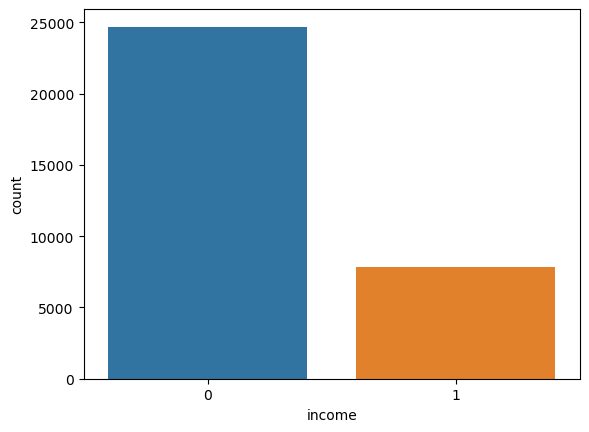

In [55]:
# Visualização grafica
sns.countplot(data=df_treino, x='income')

- **Base de Teste**
    - Fazendo o mesmo procedimento para a base de teste

In [56]:
# Frequencia de cada classe
df_teste['income'].value_counts()

income
<=50K    12430
>50K      3846
Name: count, dtype: int64

In [57]:
# Transformando em numérica
df_teste.loc[:, 'income'] = df_teste['income'].map({'>50K': 1, '<=50K': 0})

In [58]:
# Tipo da coluna income
df_teste['income'].dtype

dtype('O')

In [59]:
# Convertendo a coluna para o tipo 'int32'
df_teste['income'] = df_teste['income'].astype('int32')

## Removendo as Colunas Categóricas

- Como vimos anteriormente, temos colunas com valores catagóricos que precisam ser tratadas.
- Nesta primeira parte do projeto, vamos remover todas as colunas categóricas e testar o modelo mais simples possível
- Após isso, podemos ir melhorando nosso modelo aos poucos, tratando e analisando melhor os dados
---
- Temos uma lista com as colunas categóricas. Porém a coluna 'income' que antes era categórica, agora foi transformada para numérica e por isso precisamos remove-la da lista

In [60]:
# Removendo a coluna "income" da lista cat_cols
cat_cols = cat_cols.drop('income')
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

- **Base de Treino**

In [61]:
# Mostrando as colunas categoricas que serão removidas da base
df_treino[cat_cols].head(2)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [62]:
# Removendo as colunas categóricas da base
df_treino = df_treino.drop(cat_cols, axis=1)

- **Base de Teste**

In [63]:
# Removendo as colunas categóricas da base
df_teste= df_teste.drop(cat_cols, axis=1)

## Base Final
- Agora, vamos avaliar o resultados dos modelos utilizando a base de dados abaixo

In [64]:
# Base de Treino
df_treino.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [65]:
# Base de Teste
df_teste.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,18,103497,10,0,0,30,0


**___________________________________________________________________________________________________________________________**

<a id='modelagem'></a>
# MODELAGEM

- Vamos testar os seguintes modelos:
     - **Random Forest**
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
    
    - **KNeighborsClassifier (KNN)**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
    
    - **Logistic Regression**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
          

- Antes de usar os algoritmos, precisamos separar a base de treino em **treino e validação**
    - Vamos fazer isso utilizando o **train_test_split**
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [66]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

# Importando os modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [67]:
X = df_treino.drop('income', axis=1)
y = df_treino['income']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest

In [68]:
# Criando o classificador
clf_rf = RandomForestClassifier(random_state=42)

In [69]:
# Fazendo o fit com os dados
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Fazendo a previsão
y_pred_rf = clf_rf.predict(X_val)

## KNeighborsClassifier

In [71]:
# Criando o classificador
clf_knn = KNeighborsClassifier()

In [72]:
# Fazendo o fit com os dados
clf_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [73]:
# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

## Regressão Logística

In [74]:
# Criando o classificador
clf_log = LogisticRegression(random_state=42)

In [75]:
# Fazendo o fit com os dados
clf_log.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [76]:
# Fazendo a previsão
y_pred_log = clf_log.predict(X_val)

**___________________________________________________________________________________________________________________________**

<a id='avaliacao'></a>
# AVALIAÇÃO

- Para fazer essa análise, podemos usar:
    - Acurácia:
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    - Precisão:
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#
    - Matriz de confusão (ajuda a visualizar a distribuição dos erros):
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    - Relatório de Classificação:
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [77]:
# Importando
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
# Função para avaliação
def avaliacao(y_real, y_pred):
    # Acurácia
    acc = accuracy_score(y_real, y_pred)
    # Precisão
    pre = precision_score(y_real, y_pred)
    
    print('Accuracy:', acc)
    print('\nPrecision:', pre)

    # Relatório de classificação
    print('\n', classification_report(y_real, y_pred))

    # Matriz de confusão
    print('\n', pd.crosstab(y_real, y_pred, rownames=['Real'], colnames=['Predito']).reindex(index=[1, 0], columns=[1, 0]))
    
    return acc, pre

- **Random Forest**

In [79]:
# Para Random Forest
acc_rf, pre_rf = avaliacao(y_val, y_pred_rf)

Accuracy: 0.8034214300348289

Precision: 0.6137071651090342

               precision    recall  f1-score   support

           0       0.85      0.90      0.87      7405
           1       0.61      0.50      0.55      2357

    accuracy                           0.80      9762
   macro avg       0.73      0.70      0.71      9762
weighted avg       0.79      0.80      0.80      9762


 Predito     1     0
Real               
1        1182  1175
0         744  6661


- **KNeighborsClassifier**

In [80]:
# Para KNeighborsClassifier
acc_knn, pre_knn = avaliacao(y_val, y_pred_knn)

Accuracy: 0.7729973366113502

Precision: 0.5501779359430605

               precision    recall  f1-score   support

           0       0.81      0.91      0.86      7405
           1       0.55      0.33      0.41      2357

    accuracy                           0.77      9762
   macro avg       0.68      0.62      0.64      9762
weighted avg       0.75      0.77      0.75      9762


 Predito    1     0
Real              
1        773  1584
0        632  6773


- **Regressão Logística**

In [81]:
# Para Regressão Logística
acc_log, pre_log = avaliacao(y_val, y_pred_log)

Accuracy: 0.7976849006351158

Precision: 0.7089715536105032

               precision    recall  f1-score   support

           0       0.81      0.96      0.88      7405
           1       0.71      0.27      0.40      2357

    accuracy                           0.80      9762
   macro avg       0.76      0.62      0.64      9762
weighted avg       0.78      0.80      0.76      9762


 Predito    1     0
Real              
1        648  1709
0        266  7139


## DataFrame de Comparação

In [82]:
# Cria um dataframe para comparar a acurácia e precisão das nossas alterações
df_avaliacao = pd.DataFrame({'Modelos': ['Random Forest', 'KNN', 'Regressao Logistica']})

In [83]:
# Adiciona uma coluna e insere os resultados das avaliações
df_avaliacao['Acurácia'] = [acc_rf, acc_knn, acc_log]
df_avaliacao['Precisão'] = [pre_rf, pre_knn, pre_log]

In [84]:
# Mostra o dataframe
df_avaliacao

,Modelos,Acurácia,Precisão
0,Random Forest,0.803421,0.613707
1,KNN,0.772997,0.550178
2,Regressao Logistica,0.797685,0.708972


**___________________________________________________________________________________________________________________________**

<a id='previsao'></a>
# PREVISÃO

## Fazendo a previsão para os dados de teste
- Vamos usar o modelo RandomForest que obteve o melhor desempenho para fazer o predict na base de teste

In [85]:
# Visualizando a base de teste
df_teste.head(3)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1


- Para os dados de teste, precisamos separar a coluna income. Ela servira apenas como base para avaliar o desempenho do nosso modelo

In [86]:
# Separando em X e y
X_test = df_teste.drop('income', axis=1)
y_test = df_teste['income']

In [87]:
# Fazendo a previsão
y_pred = clf_rf.predict(X_test)

In [88]:
# Avaliando o nosso modelo
acc_pred, pre_pred = avaliacao(y_test, y_pred)

Accuracy: 0.8087982305234701

Precision: 0.6154814348646948

               precision    recall  f1-score   support

           0       0.86      0.90      0.88     12430
           1       0.62      0.51      0.56      3846

    accuracy                           0.81     16276
   macro avg       0.74      0.71      0.72     16276
weighted avg       0.80      0.81      0.80     16276


 Predito     1      0
Real                
1        1956   1890
0        1222  11208


**___________________________________________________________________________________________________________________________**

<a id='conclusao'></a>
# CONCLUSÃO

- O valor máximo de acurácia que obtivemos foi de 80.87%
    - Porém nossa precisão foi bem menor, 61.54%
- Se olharmos apenas para a acurácia, o valor pode nos enganar, isso porque nossa classe está DESBALANCEADA
---
- Como assim, desbalanceadas?
    - Observe que 75.907 % da classe são de pessoas que ganham um valor menor ou igual a 50k (classe 0)
    - E apenas 24.093 % da classe são de pessoas que ganham mais que 50k (classe 1)
- O desbalanceamento é um dos motivos do nosso modelo estar prevendo muito bem a classe 0 e prevendo muito mal a classe 1
    - É por isso que se olharmos apenas para a alta acurácia, o valor pode nos enganar. A acurácia da classe 0 eleva a acurácia geral, mascarando com isso a baixa acurácia para a classe 1.
---
- Como queremos prever se a renda da pessoa excede o valor de 50 mil por ano, precisamos melhorar as previsões para a classe 1.
    - Portanto temos que levar em consideração que as classes estão desbalanceadas e analisar diferentes métricas de validação para garantir que o nosso modelo realmente esteja se saindo bem, principalmente para prever os valores igual a 1


**Melhorias**
- Análise e tratamento mais detalhado das colunas
- Transformar as colunas categóricas em numéricas
- Pré-processamento dos dados
- Validação Cruzada
- Seleção de features
- Tunning dos Modelos

**___________________________________________________________________________________________________________________________**

<a id='resumo'></a>
# RESUMO


**Tratamento**
- Coluna Income foi transformada de categórica para numérica
- Os valores duplicados e os valores categóricos foram removidos
- Testado varios modelos com uma base simples sem muitos tratamentos

### Código dos tratamentos
```
# Removendo os valores duplicados
df_treino = df_treino.drop_duplicates(ignore_index=True)
df_teste = df_teste.drop_duplicates(ignore_index=True)

# Transformando em numérica
df_treino.loc[:, 'income'] = df_treino['income'].map({'>50K': 1, '<=50K': 0})
df_teste.loc[:, 'income'] = df_teste['income'].map({'>50K': 1, '<=50K': 0})

# Convertendo a coluna para o tipo 'int32'
df_treino['income'] = df_treino['income'].astype('int32')
df_teste['income'] = df_teste['income'].astype('int32')

```